In [22]:
import pandas as pd

# Load the CSV file using pandas
data = pd.read_csv('text_emotion.csv')

data.rename(columns={'sentiment' : 'emotion',
                   'content' : 'text'}, 
                   inplace=True)

## Visualising the Data

/var/folders/lv/l4xn1q3s7jxgwb_811k8vqrh0000gn/T/ipykernel_35362/3748114383.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="emotion", data=data, palette="Set2")


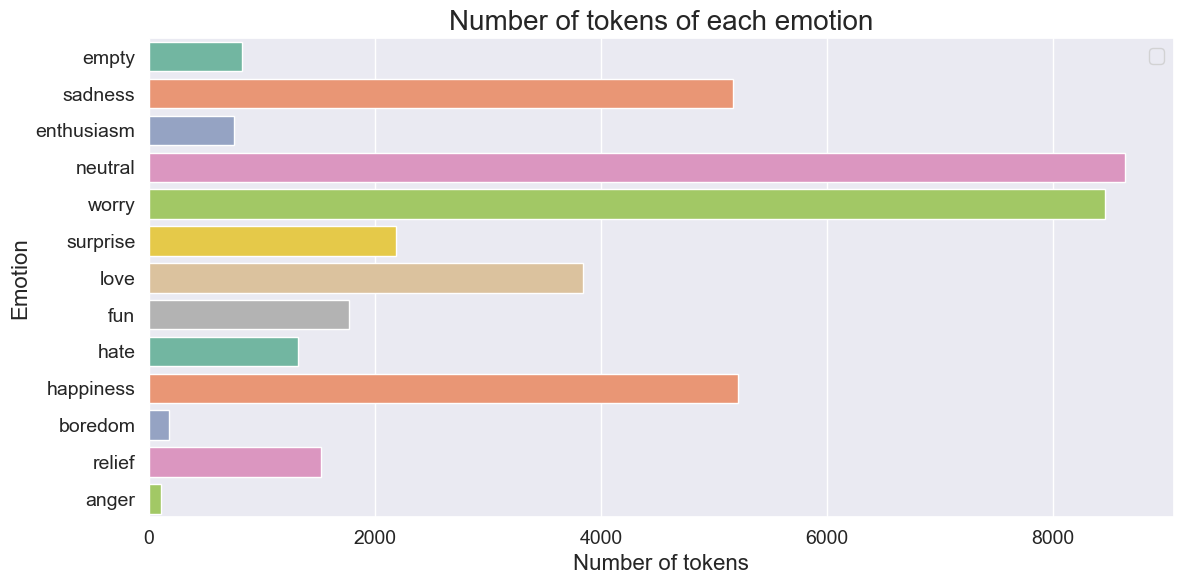

In [23]:
def visualize_data(data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style="darkgrid")

    # Plot the number of tokens of each emotion
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y="emotion", data=data, palette="Set2")
    plt.title('Number of tokens of each emotion', fontsize=20)
    plt.xlabel('Number of tokens', fontsize=16)
    plt.ylabel('Emotion', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, fontsize=14)

    # Add a border
    for spine in ax.spines.values():
        spine.set_visible(True)

    plt.tight_layout()
    plt.show()

visualize_data(data)


## Split into Train, Validation and Test Sets

In [24]:
from sklearn.model_selection import train_test_split

# Split the balanced data into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data['text'],
    data['emotion'],
    test_size=0.2,
    random_state=42
)

# Split the train set into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts,
    train_labels,
    test_size=0.2,
    random_state=42
)

# Print the shape of all sets
print(f'Number of training samples: {len(train_texts)}')
print(f'Number of validation samples: {len(val_texts)}')
print(f'Number of test samples: {len(test_texts)}')

Number of training samples: 25600
Number of validation samples: 6400
Number of test samples: 8000


In [25]:
train_labels.value_counts()

emotion
worry         5495
neutral       5484
happiness     3336
sadness       3292
love          2471
surprise      1410
fun           1112
relief         937
hate           858
empty          525
enthusiasm     480
boredom        124
anger           76
Name: count, dtype: int64

### Trainset is quite imbalanced. For a quick fix, we will just drop classes that don't have at least 2000 samples

/var/folders/lv/l4xn1q3s7jxgwb_811k8vqrh0000gn/T/ipykernel_35362/3748114383.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="emotion", data=data, palette="Set2")


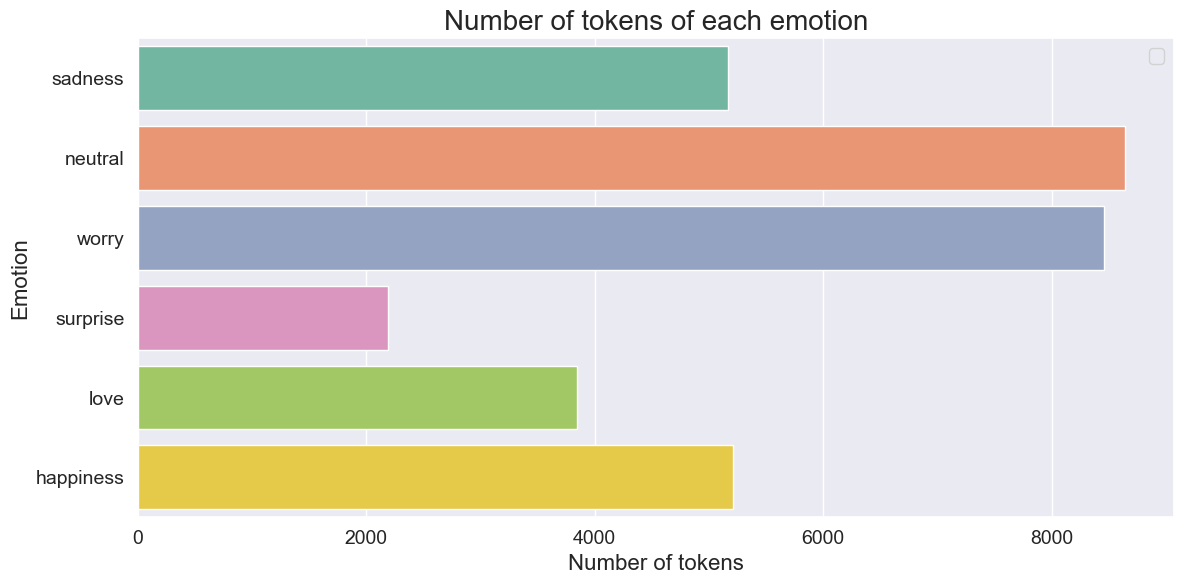

In [26]:
### Trainset is quite imbalanced. For a quick fix, we will just drop classes that don't have at least 2000 samples

# Create a new dataframe with the classes that have at least 2000 samples
data = data[data['emotion'].isin(['neutral', 'worry', 'happiness', 'sadness', 'love', 'surprise'])]
visualize_data(data)